<a href="https://colab.research.google.com/github/Jaser2005/OIBSIP/blob/master/Unemployment_Analysis_With_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
'''
Hello Everyone! This is MOHAMMED JASER JALAL
Intern at OASIS INFOBYTE, India.

I'm very excited to share my Fourth Task in Oasis Infobyte Intership November 2025 viz. Unemployment analysis with Python.
'''
# AUTHOR: MOHAMMED JASER JALAL
# TASK NAME: Unemployment analysis with Python
# 2nd Task in the list of Tasks
# TASK CATEGORY: Data Science
# DATE OF SUBMISSION: 15 December 2025
# LinkedIn Profile: https://www.linkedin.com/in/jaser-jalal-a56b43256
# GitHub Profile: https://github.com/Jaser2005/OIBSIP

"\nHello Everyone! This is MOHAMMED JASER JALAL\nIntern at OASIS INFOBYTE, India.\n\nI'm very excited to share my Fourth Task in Oasis Infobyte Intership November 2025 viz. Unemployment analysis with Python.\n"

In [32]:
# Step 1: Import necessary libraries..
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
sns.set(style="whitegrid")

In [34]:
# Step 2: Load the dataset..
df = pd.read_csv("/content/Unemployment in India.csv")

print("Dataset Preview:")
print(df.head())

Dataset Preview:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [35]:
# Basic Information About Dataset..
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None


In [36]:
# Step 3: Checking missing values..
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [37]:
# Remaining columns..(For Safety)
df.columns = df.columns.str.strip().str.replace(" ", "_")



In [38]:
# Step 4: Descriptive Statistics..
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       Estimated_Unemployment_Rate_(%)  Estimated_Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std                          10.721298        8.087988e+06   
min                           0.000000        4.942000e+04   
25%                           4.657500        1.190404e+06   
50%                           8.350000        4.744178e+06   
75%                          15.887500        1.127549e+07   
max                          76.740000        4.577751e+07   

       Estimated_Labour_Participation_Rate_(%)  
count                               740.000000  
mean                                 42.630122  
std                                   8.111094  
min                                  13.330000  
25%                                  38.062500  
50%                                  41.160000  
75%                                  45.505000  
max                        

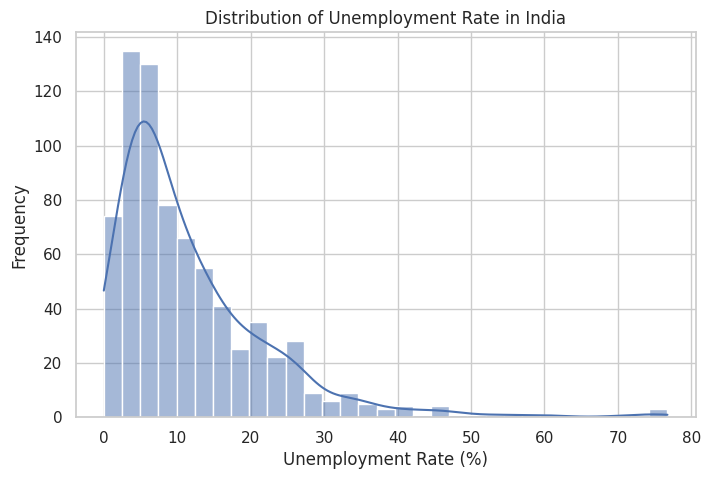

In [39]:
# EXPLORATORY DATA ANALYSIS [EDA]

# Step 5: Unemployment Rate Distribution..
plt.figure(figsize=(8,5))
sns.histplot(df['Estimated_Unemployment_Rate_(%)'], kde=True)
plt.title("Distribution of Unemployment Rate in India")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-2560698369.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Region', y='Estimated_Unemployment_Rate_(%)', palette='viridis')


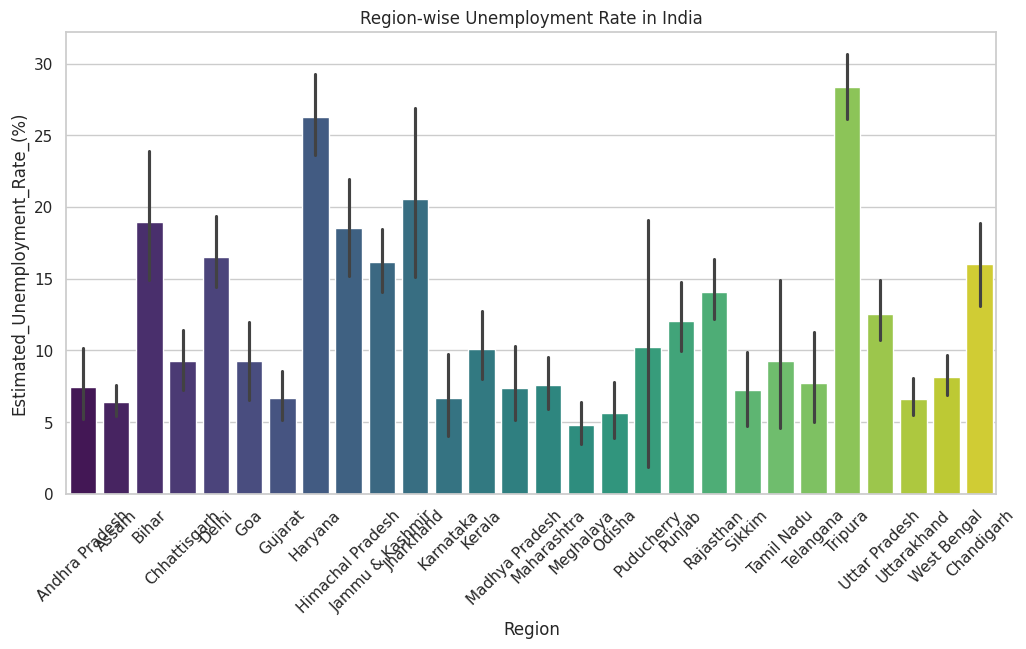

In [40]:
# Step 6: Region-wise Unemployment Rate..
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Region', y='Estimated_Unemployment_Rate_(%)', palette='viridis')
plt.title("Region-wise Unemployment Rate in India")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3562665474.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette="magma")


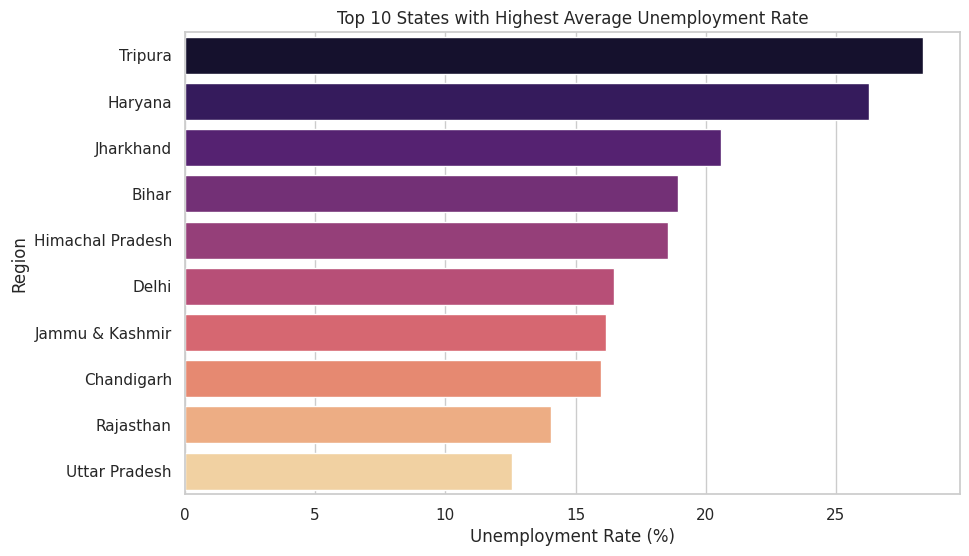

In [41]:
# Step 7: State-wise Unemployment.. (Top 10 Highest)
top_states = df.groupby("Region")["Estimated_Unemployment_Rate_(%)"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_states.values, y=top_states.index, palette="magma")
plt.title("Top 10 States with Highest Average Unemployment Rate")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Region")
plt.show()

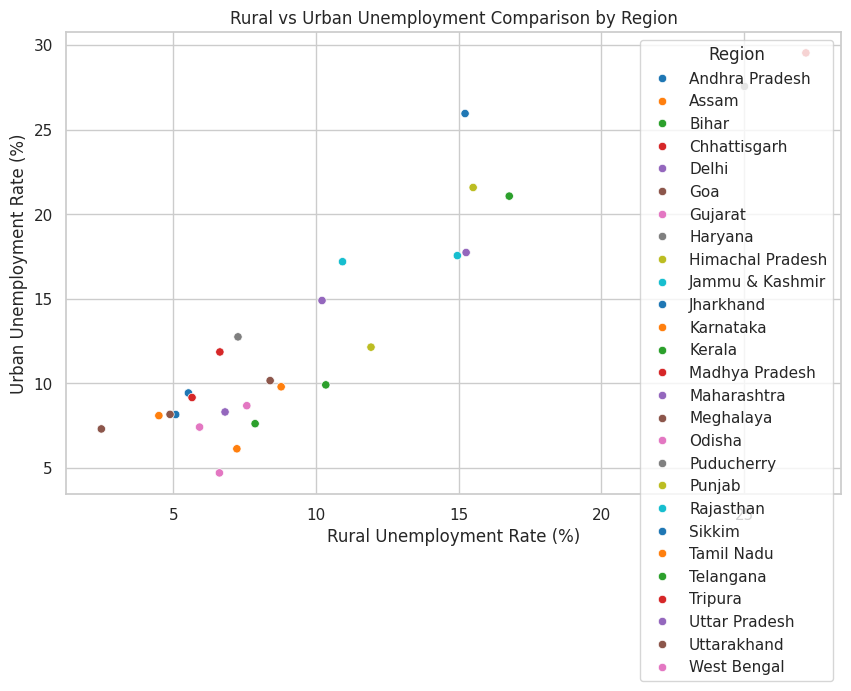

In [42]:
# Step 8: Relationship Between Rural & Urban Employment..

# Filter for rural and urban areas
df_rural = df[df['Area'] == 'Rural']
df_urban = df[df['Area'] == 'Urban']

# Calculate average unemployment rate for rural and urban per region
rural_unemployment_by_region = df_rural.groupby('Region')['Estimated_Unemployment_Rate_(%)'].mean().reset_index()
urban_unemployment_by_region = df_urban.groupby('Region')['Estimated_Unemployment_Rate_(%)'].mean().reset_index()

# Merge the dataframes to compare rural and urban unemployment rates for each region
comparison_df = pd.merge(rural_unemployment_by_region, urban_unemployment_by_region, on='Region', suffixes=('_Rural', '_Urban'))

plt.figure(figsize=(10,6))
sns.scatterplot(data=comparison_df,
                x='Estimated_Unemployment_Rate_(%)_Rural',
                y='Estimated_Unemployment_Rate_(%)_Urban',
                hue='Region', palette='tab10')
plt.title("Rural vs Urban Unemployment Comparison by Region")
plt.xlabel("Rural Unemployment Rate (%)")
plt.ylabel("Urban Unemployment Rate (%)")
plt.grid(True)
plt.show()

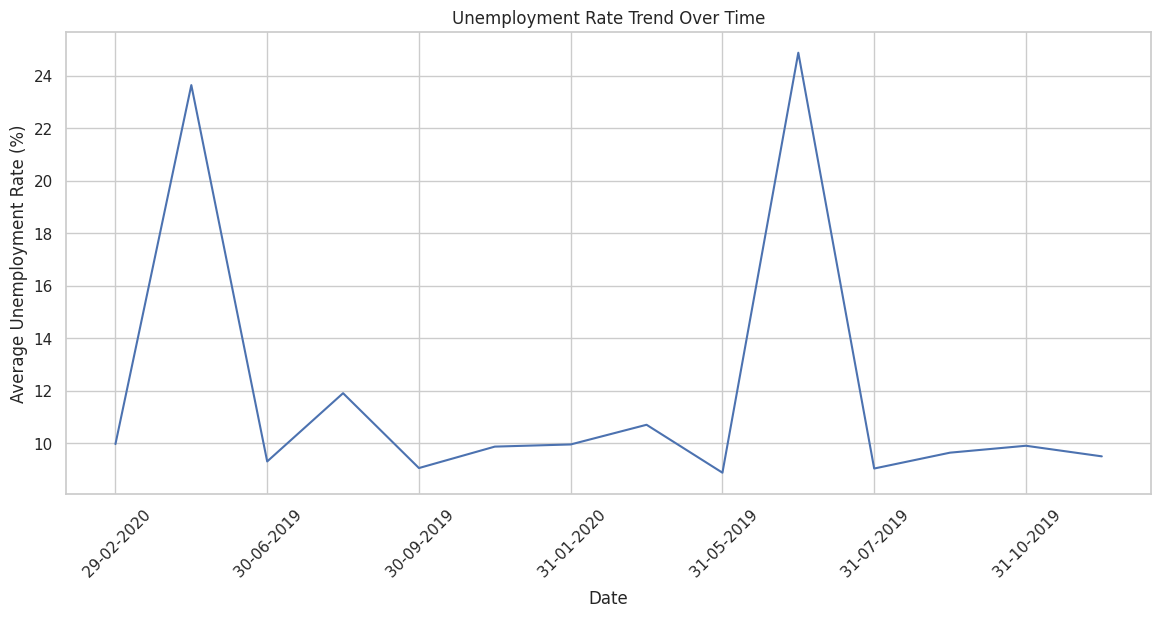

In [43]:
# Step 9: Unemployment Trend Over Time..
plt.figure(figsize=(14,6))
df.groupby("Date")["Estimated_Unemployment_Rate_(%)"].mean().plot()
plt.title("Unemployment Rate Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Average Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.show()